In [29]:
pip install plotly_express

In [30]:
pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-eszisf77
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-eszisf77
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+101.g6c0a8ac76-cp36-cp36m-linux_x86_64.whl size=17733915 sha256=a06f85cb6ac944b5b336cca09a2fbb60e835021b21a250ee2a46df643f56b153
  Stored in directory: /tmp/pip-ephem-wheel-cache-wrfkcr8e/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
ERROR: pmdarima 1.7.1 has requirement statsmodels<0.12,>=0.11, but you'll have statsmodels 0.13.0.dev0+101.g6c0a8ac76 which is incompatible.
  Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1


In [31]:
pip install fbprophet

In [32]:
pip install pmdarima --user

  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl


# Importing Libraries


In [1]:
import pandas as pd
import itertools
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import numpy as np
from scipy import signal
from time import time
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from math import sqrt
import warnings 
from fbprophet import Prophet
from IPython.display import display, clear_output
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot') # For plots

# Loading Training Dataset

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/JaiminBrahmbhatt/WaterLevel_Prediction_Model/main/BHPtraining.csv', parse_dates=['Date Time'])
train = train.set_index('Date Time')
train

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,NaN,2.418,0.000,NaN,NaN,NaN
2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64
...,...,...,...,...,...,...
2019-12-31 23:30:00,58.8,1.444,0.200,14.00,40.0,15.55
2019-12-31 23:36:00,58.8,1.381,0.184,13.61,32.0,16.13
2019-12-31 23:42:00,58.8,1.493,0.230,13.41,31.0,15.16


# Loading Testing Dataset

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/JaiminBrahmbhatt/WaterLevel_Prediction_Model/main/BHPtest.csv', parse_dates=['Date Time'])
test = test.set_index('Date Time')
test

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,59.0,1.499,0.197,12.44,30.0,15.94
2020-01-01 00:06:00,59.0,1.486,0.180,13.41,33.0,16.33
2020-01-01 00:12:00,59.2,1.490,0.194,12.83,37.0,14.97
2020-01-01 00:18:00,59.2,1.578,0.223,12.44,34.0,15.16
2020-01-01 00:24:00,59.0,1.522,0.194,13.22,28.0,16.13
...,...,...,...,...,...,...
2020-10-21 01:24:00,79.5,3.143,0.394,14.38,75.0,16.13
2020-10-21 01:30:00,79.5,3.087,0.390,13.80,79.0,15.55
2020-10-21 01:36:00,79.5,3.159,0.413,13.22,77.0,15.55


## Merging Training and Testing for cleaning

In [4]:
dataset = pd.concat([train,test])
dataset

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,NaN,2.418,0.000,NaN,NaN,NaN
2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64
...,...,...,...,...,...,...
2020-10-21 01:24:00,79.5,3.143,0.394,14.38,75.0,16.13
2020-10-21 01:30:00,79.5,3.087,0.390,13.80,79.0,15.55
2020-10-21 01:36:00,79.5,3.159,0.413,13.22,77.0,15.55


**Resample the dataset to Hourly Data**

In [5]:
dataset_hourly = dataset.resample('1H').mean()
dataset_hourly

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.900000,2.447500,0.149200,4.860000,136.111111,5.355556
2017-01-01 01:00:00,63.980000,2.246100,0.162900,4.237000,134.200000,4.666000
2017-01-01 02:00:00,64.180000,2.250600,0.153900,5.073000,129.700000,5.404000
2017-01-01 03:00:00,64.300000,2.102700,0.160800,5.015000,112.200000,5.287000
2017-01-01 04:00:00,64.180000,2.027900,0.168600,6.725000,82.800000,7.115000
...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000


**Checking available Correlation**

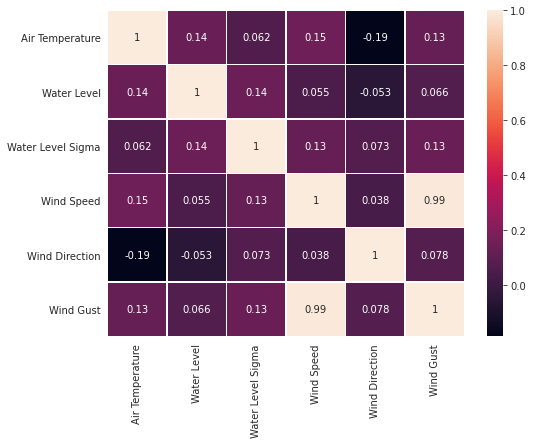

In [6]:
spearmancorr = dataset_hourly.corr(method='spearman')
mask = np.zeros_like(spearmancorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            #cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [7]:
columns = dataset_hourly.columns
columns

Index(['Air Temperature', 'Water Level', 'Water Level Sigma', 'Wind Speed',
       'Wind Direction', 'Wind Gust'],
      dtype='object')

**Filling missing values in the dataset and generic plot based on it**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ba8208438>,
      dtype=object)

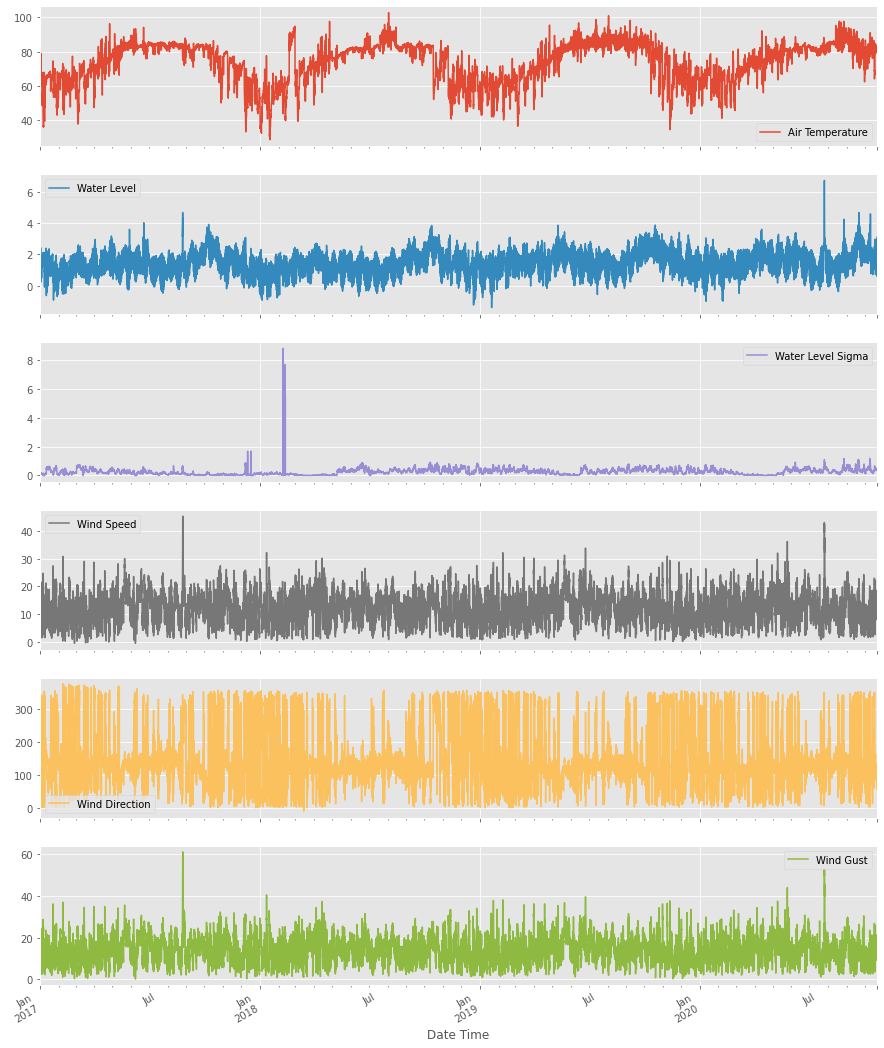

In [8]:
for key in dataset_hourly.keys():
    temp = dataset_hourly[key]
    nan_index = temp.isnull()
    temp = temp.interpolate('linear')
    results = seasonal_decompose(temp,period=24*30*12, model='additive', extrapolate_trend='freq')
    for i, real in enumerate(nan_index):
        if real == True:
            results.trend.iloc[i] = np.nan
            dt = '2019-' + str(results.resid.index[i])[5:]
            results.seasonal.iloc[i] = results.seasonal.loc[dt]
            results.resid.iloc[i] = results.resid.loc[dt]
    dataset_hourly[key] = results.trend.interpolate('linear') + results.seasonal + results.resid

  
dataset_hourly[columns].plot(figsize=(15, 20), subplots=True)

**Extracting the Water Level data**

In [9]:
waterleveldf = dataset_hourly[['Water Level']]
waterleveldf

,Water Level
Date Time,
2017-01-01 00:00:00,2.447500
2017-01-01 01:00:00,2.246100
2017-01-01 02:00:00,2.250600
2017-01-01 03:00:00,2.102700
2017-01-01 04:00:00,2.027900
...,...
2020-10-20 21:00:00,1.858000
2020-10-20 22:00:00,2.366700
2020-10-20 23:00:00,2.721800


# Create a function to run the two tests which determine whether a given time series is stationary

Before applying any statistical model on a time series, we want to ensure it’s stationary.
If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. Most statistical modelling methods assume or require the time series to be stationary.



In [10]:
def test_stationarity(timeseries, window = 360, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

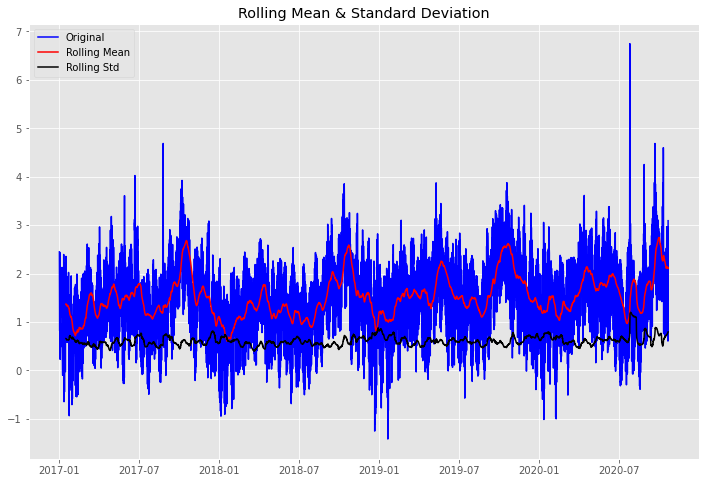

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.366553e+00
p-value                        2.733074e-13
#Lags Used                     5.200000e+01
Number of Observations Used    3.328500e+04
Critical Value (1%)           -3.430546e+00
Critical Value (5%)           -2.861627e+00
Critical Value (10%)          -2.566816e+00
dtype: float64


In [11]:
test_stationarity(waterleveldf['Water Level'])

Here we get p-value is 0 so we can assume that series is stationary

**Plotting the Autocorrelation and Partial Autocorrelation plots**

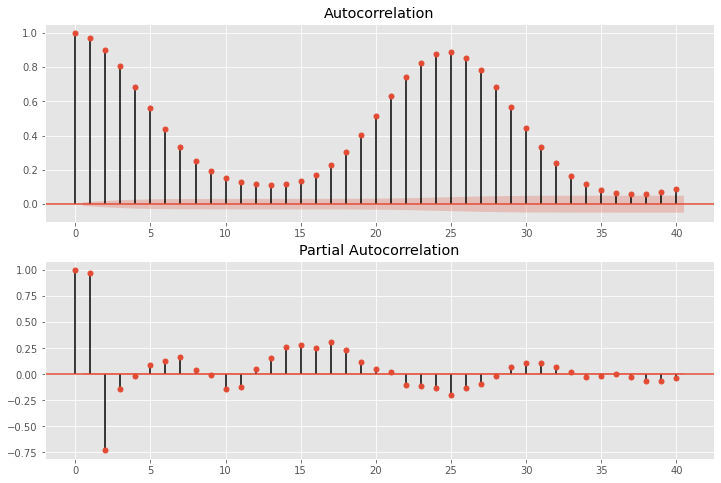

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(waterleveldf['Water Level'], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(waterleveldf['Water Level'], lags=40, ax=ax2)# , lags=40

# Time Series Seasonal Decomposition
Using the statsmodels library which provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative. Here we will be using additive model.


The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.


<Figure size 432x288 with 0 Axes>

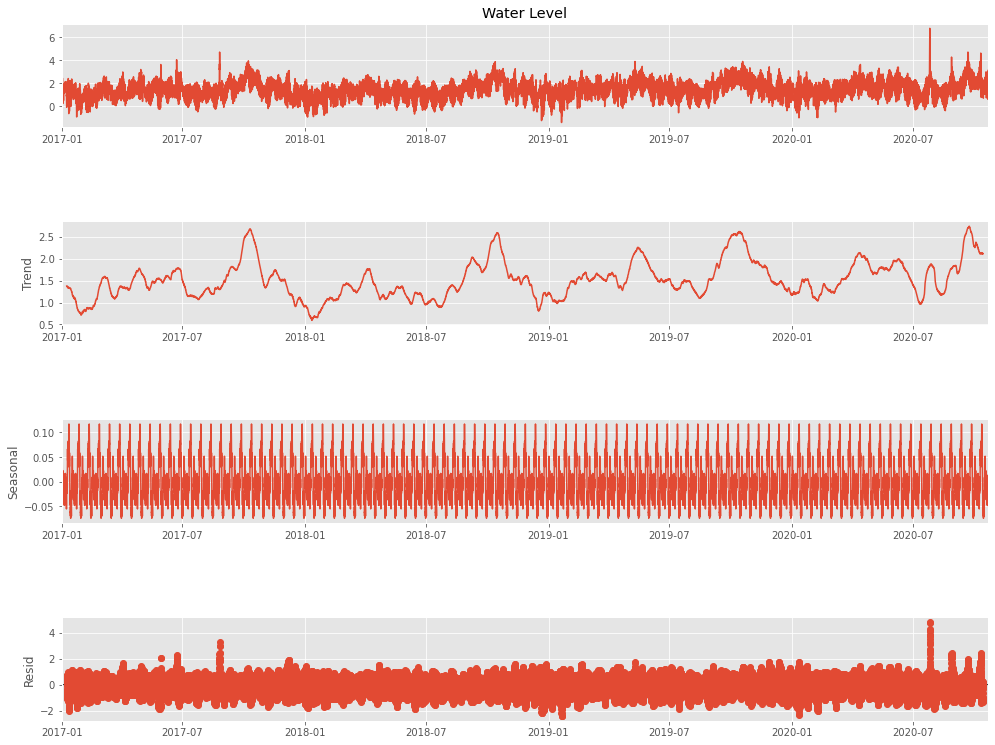

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(waterleveldf['Water Level'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

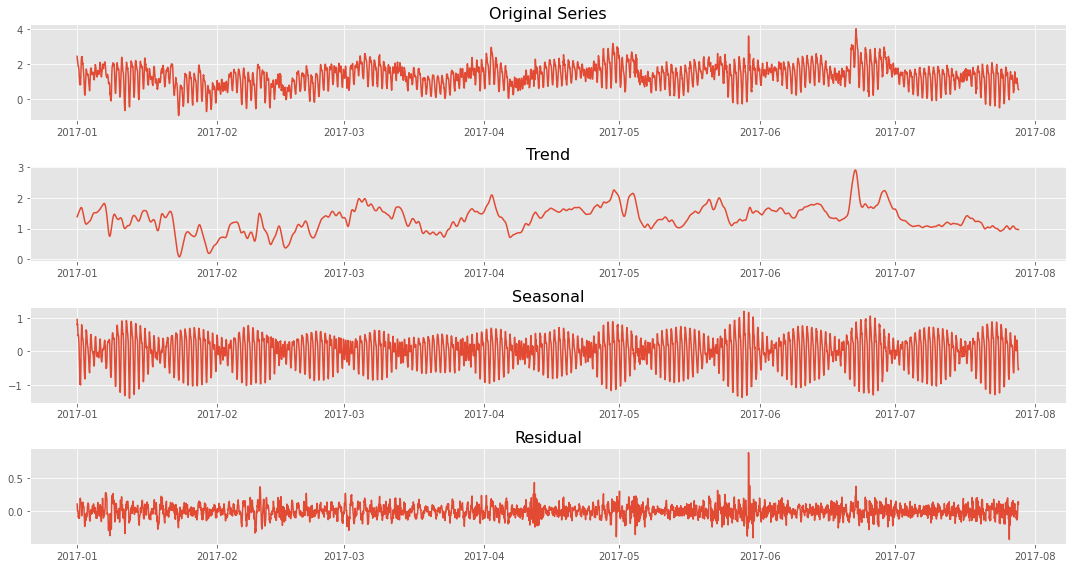

In [14]:
first_5k_obs = waterleveldf['Water Level'][:5000]

stl = STL(first_5k_obs)
result = stl.fit()

seasonal, trend, resid = result.seasonal, result.trend, result.resid

plt.figure(figsize=(15,8))

plt.subplot(4,1,1)
plt.plot(first_5k_obs)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

# Creating time series features from datetime index

In [15]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(waterleveldf, label='Water Level')

features_and_target = pd.concat([X, y], axis=1)
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Water Level
Date Time,,,,,,,,,
2017-01-01 00:00:00,0,6,1,1,2017,1,1,52,2.447500
2017-01-01 01:00:00,1,6,1,1,2017,1,1,52,2.246100
2017-01-01 02:00:00,2,6,1,1,2017,1,1,52,2.250600
2017-01-01 03:00:00,3,6,1,1,2017,1,1,52,2.102700
2017-01-01 04:00:00,4,6,1,1,2017,1,1,52,2.027900
...,...,...,...,...,...,...,...,...,...
2020-10-20 21:00:00,21,1,4,10,2020,294,20,43,1.858000
2020-10-20 22:00:00,22,1,4,10,2020,294,20,43,2.366700
2020-10-20 23:00:00,23,1,4,10,2020,294,20,43,2.721800


**Plotting Box Plots and Violin Plots**

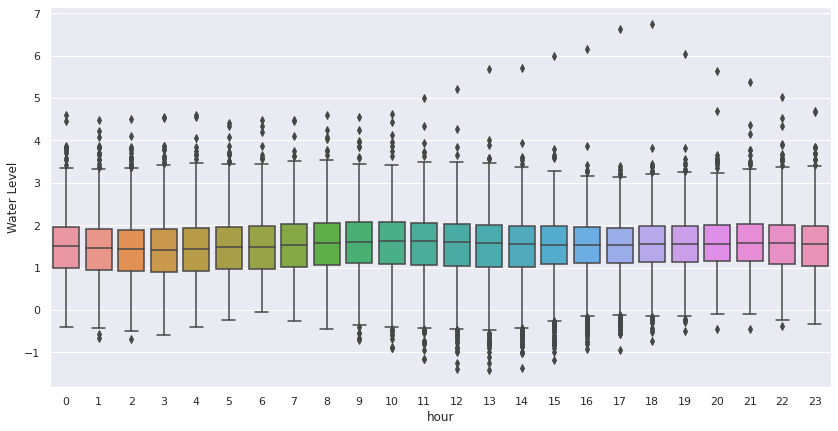

In [16]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'hour', y = 'Water Level')

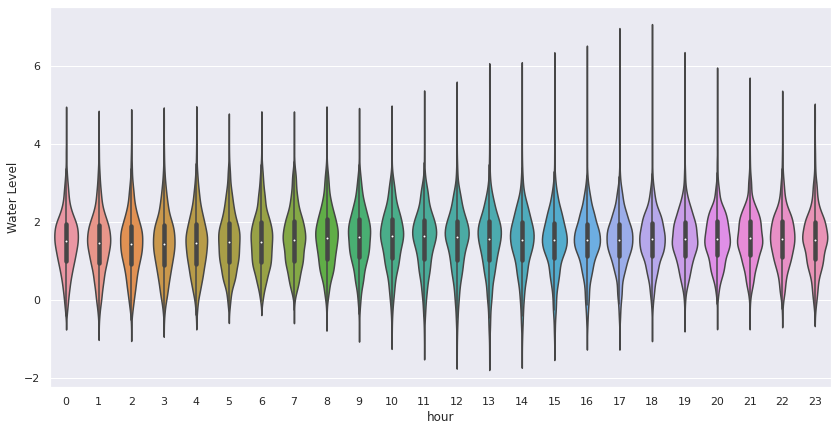

In [17]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'hour', y = 'Water Level')

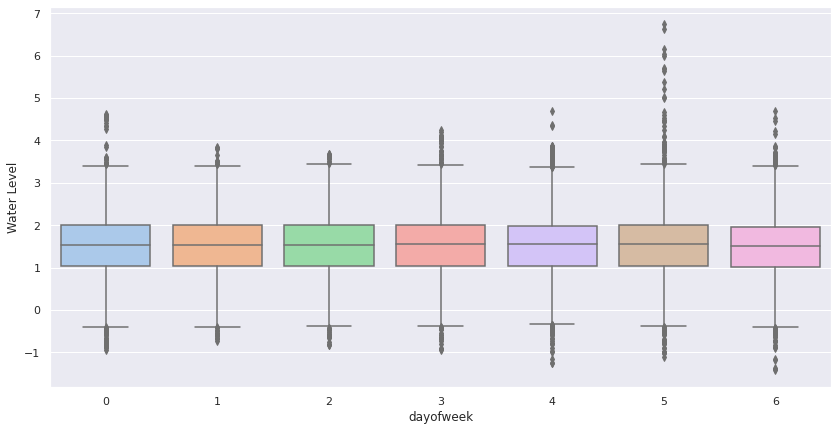

In [18]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'dayofweek', y = 'Water Level')

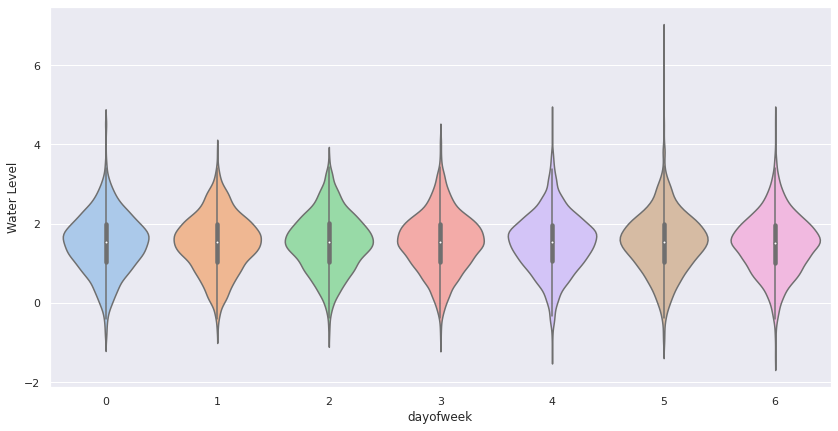

In [19]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'dayofweek', y = 'Water Level')

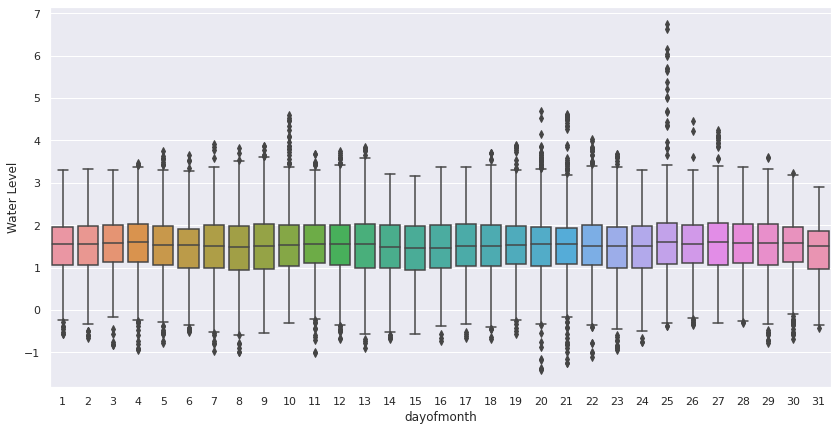

In [20]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'dayofmonth', y = 'Water Level')

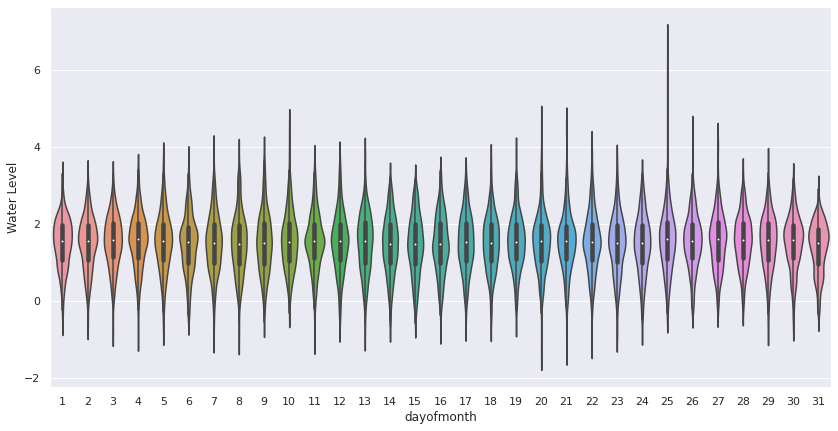

In [21]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'dayofmonth', y = 'Water Level')

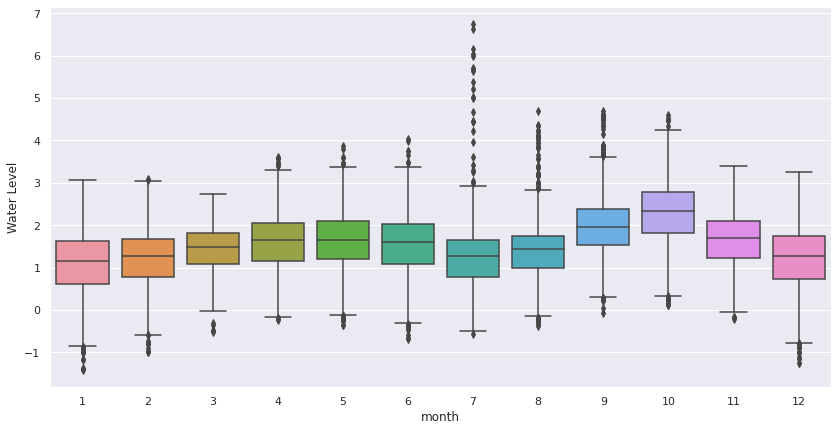

In [22]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'month', y = 'Water Level')

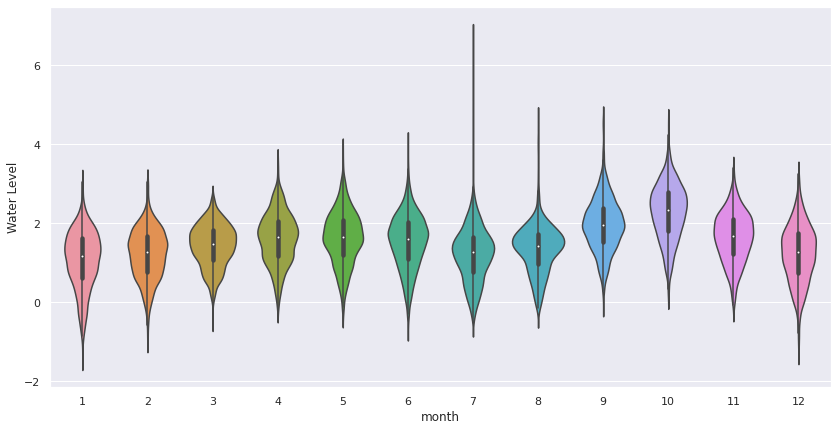

In [23]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'month', y = 'Water Level')

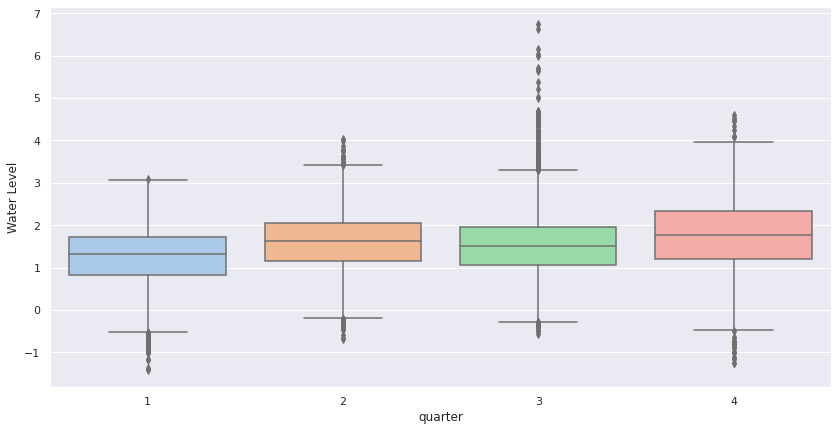

In [24]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'quarter', y = 'Water Level')

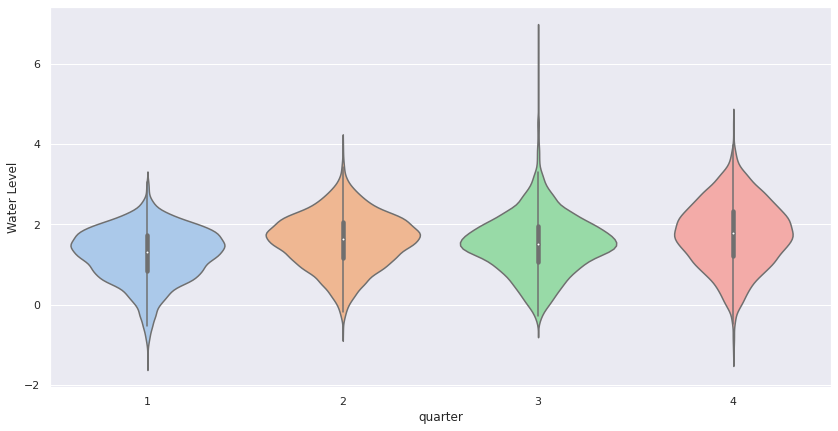

In [25]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'quarter', y = 'Water Level')

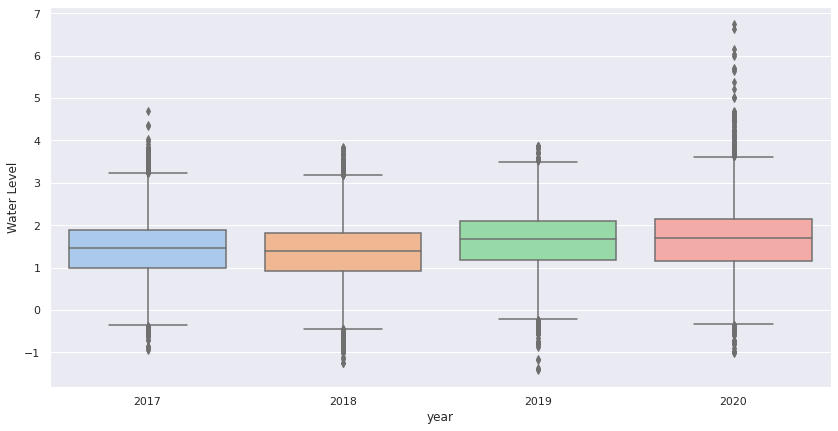

In [26]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.boxplot(data = features_and_target, x = 'year', y = 'Water Level')

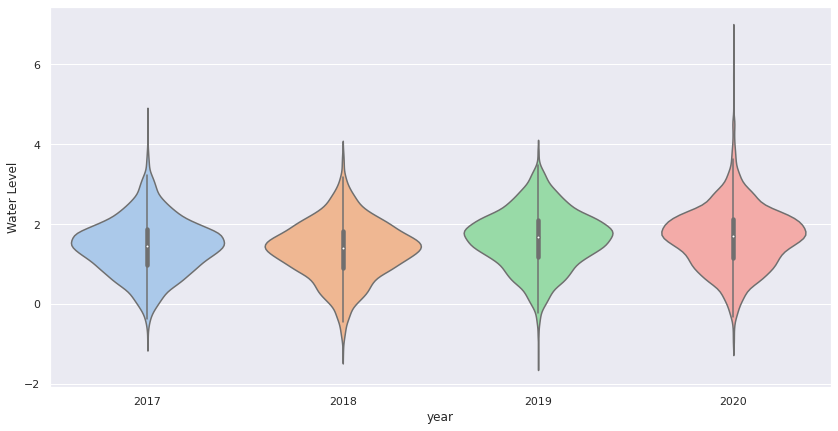

In [27]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_palette("pastel")
sns.color_palette("hls", 8)
sns.violinplot(data = features_and_target, x = 'year', y = 'Water Level')

#Splitting the Dataset again in Train and Test


In [28]:
split_date = '01-Jan-2020 00:00:00'
waterleveldf_train = waterleveldf.loc[waterleveldf.index < split_date].copy()
waterleveldf_test = waterleveldf.loc[waterleveldf.index >= split_date].copy()

**Plotting the Test and Training Data in generic plot**

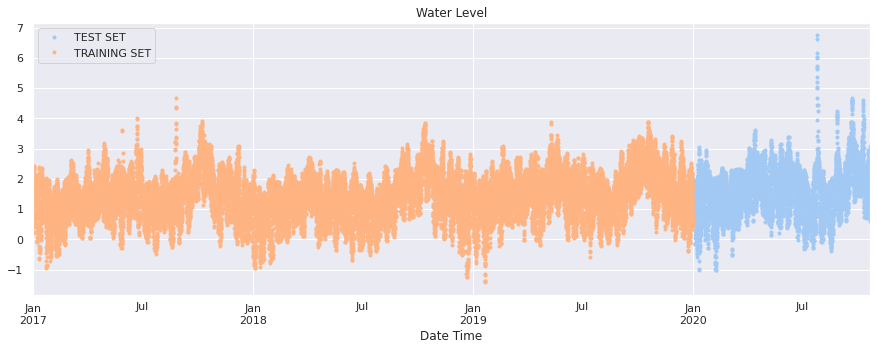

In [29]:
waterleveldf_test \
    .rename(columns={'Water Level': 'TEST SET'}) \
    .join(waterleveldf_train.rename(columns={'Water Level': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Water Level', style='.')
plt.show()

# Model 1 using Prophet Model

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

https://facebook.github.io/prophet/

**# Format data for prophet model using ds and y**

In [30]:
waterleveldf_train.reset_index() \
    .rename(columns={'Date Time':'ds',
                     'Water Level':'y'}).head()

,ds,y
0,2017-01-01 00:00:00,2.4475
1,2017-01-01 01:00:00,2.2461
2,2017-01-01 02:00:00,2.2506
3,2017-01-01 03:00:00,2.1027
4,2017-01-01 04:00:00,2.0279


**# Setup and train model and fit**

In [31]:
model = Prophet()
model.fit(waterleveldf_train.reset_index() \
              .rename(columns={'Date Time':'ds',
                               'Water Level':'y'}))

**# Predict on training set with model**

In [32]:
waterleveldf_test_fcst = model.predict(df=waterleveldf_test.reset_index() \
                                   .rename(columns={'Date Time':'ds'}))


**# OutputDataframe**

In [33]:
waterleveldf_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,1.677832,0.577311,2.116269,1.677832,1.677832,-0.348134,-0.348134,-0.348134,-0.017998,-0.017998,-0.017998,0.016197,0.016197,0.016197,-0.346333,-0.346333,-0.346333,0.0,0.0,0.0,1.329698
1,2020-01-01 01:00:00,1.677840,0.556863,2.008009,1.677840,1.677840,-0.381329,-0.381329,-0.381329,-0.052667,-0.052667,-0.052667,0.017903,0.017903,0.017903,-0.346565,-0.346565,-0.346565,0.0,0.0,0.0,1.296511
2,2020-01-01 02:00:00,1.677847,0.529539,2.092344,1.677847,1.677847,-0.392691,-0.392691,-0.392691,-0.065446,-0.065446,-0.065446,0.019556,0.019556,0.019556,-0.346801,-0.346801,-0.346801,0.0,0.0,0.0,1.285156
3,2020-01-01 03:00:00,1.677854,0.532374,2.031160,1.677854,1.677854,-0.381385,-0.381385,-0.381385,-0.055489,-0.055489,-0.055489,0.021144,0.021144,0.021144,-0.347040,-0.347040,-0.347040,0.0,0.0,0.0,1.296469
4,2020-01-01 04:00:00,1.677862,0.528541,2.123398,1.677862,1.677862,-0.355582,-0.355582,-0.355582,-0.030956,-0.030956,-0.030956,0.022657,0.022657,0.022657,-0.347283,-0.347283,-0.347283,0.0,0.0,0.0,1.322280


**Plot the forecast**

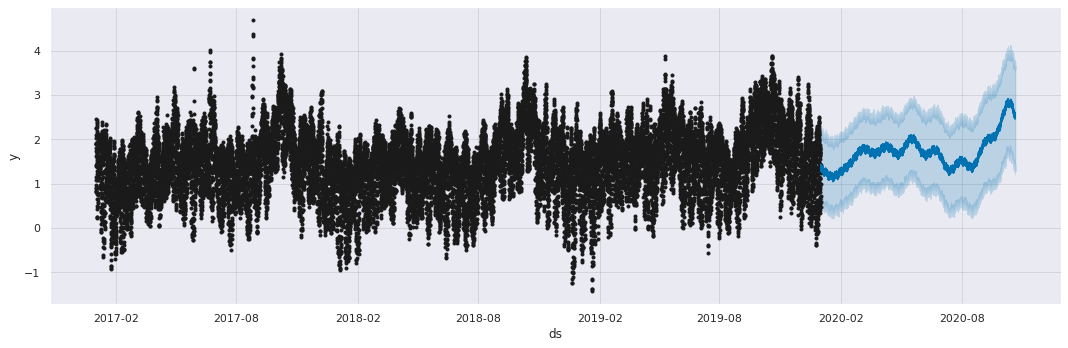

In [34]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(waterleveldf_test_fcst,
                 ax=ax)
plt.show()

**# Plot the components of the model**

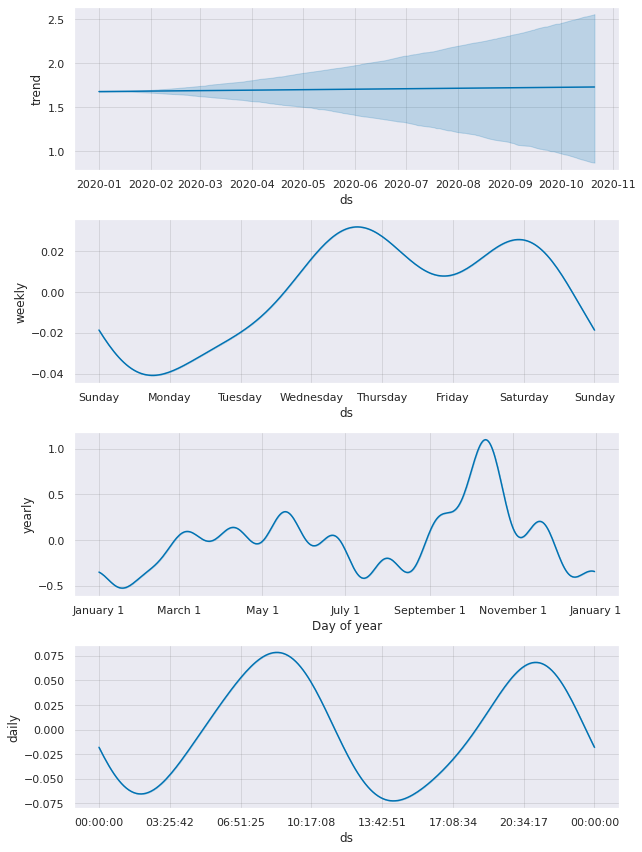

In [35]:
fig = model.plot_components(waterleveldf_test_fcst)

**# Plot the forecast with the actuals**

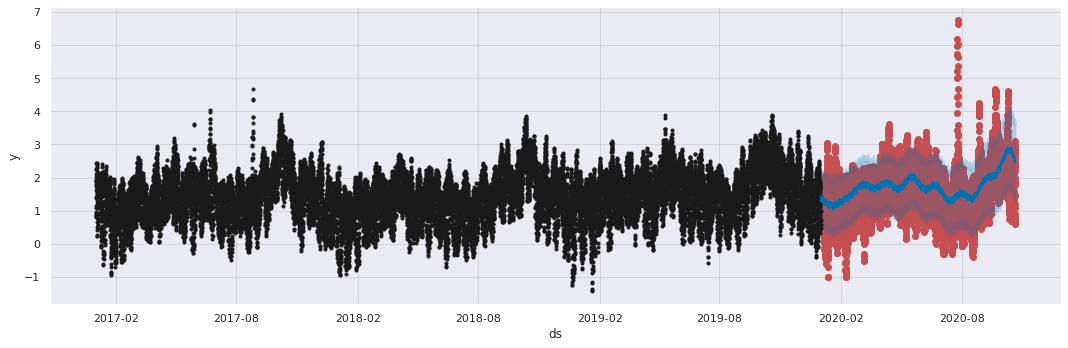

In [36]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(waterleveldf_test.index, waterleveldf_test['Water Level'], color='r')
fig = model.plot(waterleveldf_test_fcst, ax=ax)

**Putting Actual Values and Predicted Values together**

In [37]:
Actual = waterleveldf_test.reset_index()
Actual

,Date Time,Water Level
0,2020-01-01 00:00:00,1.534800
1,2020-01-01 01:00:00,1.636500
2,2020-01-01 02:00:00,1.705300
3,2020-01-01 03:00:00,1.627100
4,2020-01-01 04:00:00,1.598100
...,...,...
7053,2020-10-20 21:00:00,1.858000
7054,2020-10-20 22:00:00,2.366700
7055,2020-10-20 23:00:00,2.721800
7056,2020-10-21 00:00:00,2.967100


In [38]:
Prediction = waterleveldf_test_fcst['yhat']
Prediction = Prediction.reset_index(drop=True)
Prediction

0       1.329698
1       1.296511
2       1.285156
3       1.296469
4       1.322280
          ...   
7053    2.591562
7054    2.581514
7055    2.547442
7056    2.503071
7057    2.467510
Name: yhat, Length: 7058, dtype: float64

**#Output on Test Data per hour**

In [39]:
output = pd.concat([Actual, Prediction],axis=1)
output = output.set_index(['Date Time'])
output

,Water Level,yhat
Date Time,,
2020-01-01 00:00:00,1.534800,1.329698
2020-01-01 01:00:00,1.636500,1.296511
2020-01-01 02:00:00,1.705300,1.285156
2020-01-01 03:00:00,1.627100,1.296469
2020-01-01 04:00:00,1.598100,1.322280
...,...,...
2020-10-20 21:00:00,1.858000,2.591562
2020-10-20 22:00:00,2.366700,2.581514
2020-10-20 23:00:00,2.721800,2.547442


**#Output on Test Data 2 Times Per day Noon and Midnight**

In [40]:
testdates = pd.date_range('01-01-2020','10-15-2020',freq='12H')
outputdf=output.reindex(testdates)
outputdf

,Water Level,yhat
2020-01-01 00:00:00,1.534800,1.329698
2020-01-01 12:00:00,1.224300,1.335139
2020-01-02 00:00:00,1.594700,1.334306
2020-01-02 12:00:00,1.761200,1.309666
2020-01-03 00:00:00,1.829000,1.307230
...,...,...
2020-10-13 00:00:00,0.911444,2.784288
2020-10-13 12:00:00,1.839500,2.786722
2020-10-14 00:00:00,0.695400,2.805855
2020-10-14 12:00:00,1.679600,2.803999


In [41]:
waterleveldf

,Water Level
Date Time,
2017-01-01 00:00:00,2.447500
2017-01-01 01:00:00,2.246100
2017-01-01 02:00:00,2.250600
2017-01-01 03:00:00,2.102700
2017-01-01 04:00:00,2.027900
...,...
2020-10-20 21:00:00,1.858000
2020-10-20 22:00:00,2.366700
2020-10-20 23:00:00,2.721800


In [42]:
model = Prophet()
model.fit(waterleveldf.reset_index() \
    .rename(columns={'Date Time':'ds',
                     'Water Level':'y'}))



In [43]:
future = model.make_future_dataframe(periods=365)
future = future[~(future['ds'] < '2020-10-22')]
future

,ds
33338,2020-10-22 01:00:00
33339,2020-10-23 01:00:00
33340,2020-10-24 01:00:00
33341,2020-10-25 01:00:00
33342,2020-10-26 01:00:00
...,...
33698,2021-10-17 01:00:00
33699,2021-10-18 01:00:00
33700,2021-10-19 01:00:00
33701,2021-10-20 01:00:00


In [44]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-22 01:00:00,1.485867,1.235687,2.909012,1.485867,1.485867,0.576383,0.576383,0.576383,-0.079508,-0.079508,-0.079508,0.021633,0.021633,0.021633,0.634258,0.634258,0.634258,0.0,0.0,0.0,2.062250
1,2020-10-23 01:00:00,1.484746,1.200371,2.832112,1.484746,1.484746,0.492926,0.492926,0.492926,-0.079508,-0.079508,-0.079508,-0.004818,-0.004818,-0.004818,0.577252,0.577252,0.577252,0.0,0.0,0.0,1.977672
2,2020-10-24 01:00:00,1.483625,1.109982,2.720976,1.483625,1.483625,0.458105,0.458105,0.458105,-0.079508,-0.079508,-0.079508,0.017473,0.017473,0.017473,0.520140,0.520140,0.520140,0.0,0.0,0.0,1.941730
3,2020-10-25 01:00:00,1.482504,1.044507,2.633287,1.482504,1.482504,0.375501,0.375501,0.375501,-0.079508,-0.079508,-0.079508,-0.008770,-0.008770,-0.008770,0.463779,0.463779,0.463779,0.0,0.0,0.0,1.858005
4,2020-10-26 01:00:00,1.481384,1.042165,2.623744,1.481384,1.481384,0.309840,0.309840,0.309840,-0.079508,-0.079508,-0.079508,-0.019651,-0.019651,-0.019651,0.408999,0.408999,0.408999,0.0,0.0,0.0,1.791224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-10-17 01:00:00,1.082400,0.373823,3.275859,-0.159467,2.187601,0.810007,0.810007,0.810007,-0.079508,-0.079508,-0.079508,-0.008770,-0.008770,-0.008770,0.898285,0.898285,0.898285,0.0,0.0,0.0,1.892407
361,2021-10-18 01:00:00,1.081280,0.406163,3.203181,-0.164655,2.194671,0.756341,0.756341,0.756341,-0.079508,-0.079508,-0.079508,-0.019651,-0.019651,-0.019651,0.855499,0.855499,0.855499,0.0,0.0,0.0,1.837620
362,2021-10-19 01:00:00,1.080159,0.254640,3.210966,-0.169843,2.201886,0.718734,0.718734,0.718734,-0.079508,-0.079508,-0.079508,-0.010147,-0.010147,-0.010147,0.808389,0.808389,0.808389,0.0,0.0,0.0,1.798893
363,2021-10-20 01:00:00,1.079038,0.303922,3.205501,-0.175031,2.204458,0.682420,0.682420,0.682420,-0.079508,-0.079508,-0.079508,0.004280,0.004280,0.004280,0.757648,0.757648,0.757648,0.0,0.0,0.0,1.761458


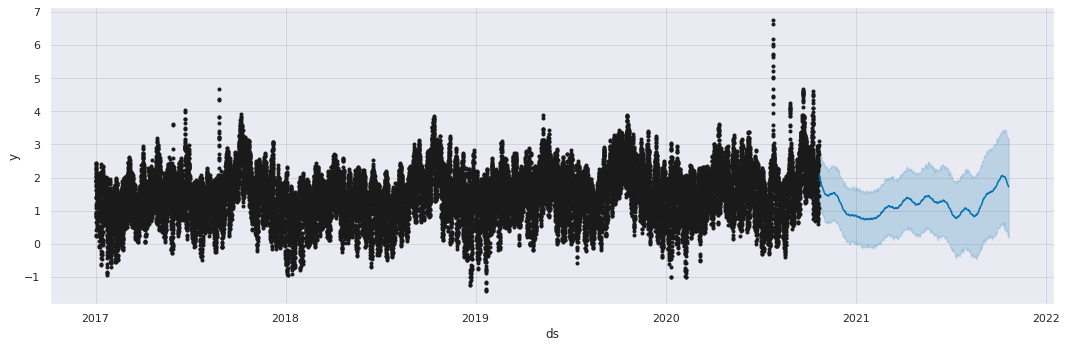

In [45]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,
                 ax=ax)
plt.show()

# Defining the Evaluation Metrics

In [46]:
from sklearn.metrics import max_error
def evaluate(pred, test, model='', use_true_label=False):
    # since we applied differencing earlier, it might be better if we revert them back
    if use_true_label:
        pred = reconstruct(pred)
        test = reconstruct(test)

        print(pred)
        print(test)
    
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)
    mae = mean_absolute_error(test, pred)
    medae = median_absolute_error(test, pred)
    me = (test.values - pred.values).mean()
    maxerr = max_error(test, pred)
    
    errors = {'RMSE': sqrt(mse), 'R2': r2, 'MSE': mse, 'ME': me, 'MAE': mae, 'MedAE': medae, 'MaxErr' : maxerr}
    
    eval_df = pd.DataFrame(errors, index=[model]).round(3)
    return eval_df

#Evaluating Model 1

In [47]:
evaluate(waterleveldf_test['Water Level'],
                   waterleveldf_test_fcst['yhat'])

,RMSE,R2,MSE,ME,MAE,MedAE,MaxErr
,0.74,-2.866,0.548,0.045,0.577,0.477,5.294


In [48]:
waterleveldf_train

,Water Level
Date Time,
2017-01-01 00:00:00,2.4475
2017-01-01 01:00:00,2.2461
2017-01-01 02:00:00,2.2506
2017-01-01 03:00:00,2.1027
2017-01-01 04:00:00,2.0279
...,...
2019-12-31 19:00:00,0.5822
2019-12-31 20:00:00,0.7208
2019-12-31 21:00:00,0.9824


# Model 2 using AUTO ARIMA 

Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-39979.369, Time=53.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16923.365, Time=3.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-35085.536, Time=2.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-28697.327, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16925.364, Time=0.97 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-35259.065, Time=22.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35123.423, Time=23.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-35225.372, Time=53.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-41486.451, Time=51.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-35708.638, Time=35.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-40039.794, Time=67.49 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-41593.846, Time=76.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-36357.010, Time=42.39 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-41482.765, Time=79.54

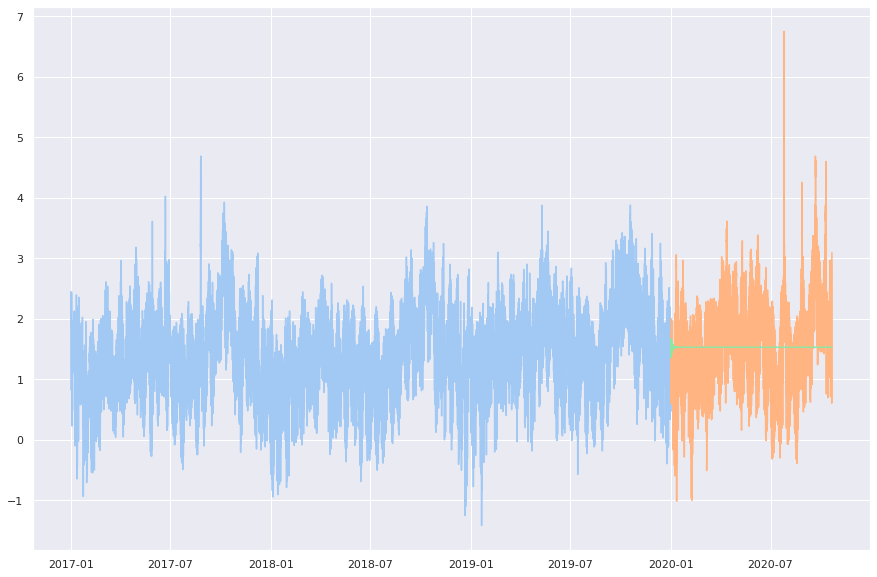

Evaluating Model 2


,RMSE,R2,MSE,ME,MAE,MedAE,MaxErr
,0.794,-9845.088,0.63,-0.135,0.617,0.518,5.216


In [49]:
model = auto_arima(waterleveldf_train['Water Level'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(waterleveldf_train['Water Level'])

forecast = model.predict(n_periods=len(waterleveldf_test))
forecast = pd.DataFrame(forecast,index = waterleveldf_test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(15,10))
plt.plot(waterleveldf_train, label='Train')
plt.plot(waterleveldf_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

print('Evaluating Model 2')
evaluate(waterleveldf_test,forecast)

In [50]:
Actual = waterleveldf_test.reset_index()
Actual

,Date Time,Water Level
0,2020-01-01 00:00:00,1.534800
1,2020-01-01 01:00:00,1.636500
2,2020-01-01 02:00:00,1.705300
3,2020-01-01 03:00:00,1.627100
4,2020-01-01 04:00:00,1.598100
...,...,...
7053,2020-10-20 21:00:00,1.858000
7054,2020-10-20 22:00:00,2.366700
7055,2020-10-20 23:00:00,2.721800
7056,2020-10-21 00:00:00,2.967100


In [51]:
forecast

,Prediction
Date Time,
2020-01-01 00:00:00,1.556197
2020-01-01 01:00:00,1.622138
2020-01-01 02:00:00,1.628461
2020-01-01 03:00:00,1.588582
2020-01-01 04:00:00,1.517997
...,...
2020-10-20 21:00:00,1.529556
2020-10-20 22:00:00,1.529556
2020-10-20 23:00:00,1.529556


In [52]:
Prediction = forecast['Prediction']
Prediction = Prediction.reset_index(drop=True)
Prediction

0       1.556197
1       1.622138
2       1.628461
3       1.588582
4       1.517997
          ...   
7053    1.529556
7054    1.529556
7055    1.529556
7056    1.529556
7057    1.529556
Name: Prediction, Length: 7058, dtype: float64

**Prediction of Model 2 compared to original**

In [53]:
output = pd.concat([Actual, Prediction],axis=1)
output = output.set_index(['Date Time'])
output

,Water Level,Prediction
Date Time,,
2020-01-01 00:00:00,1.534800,1.556197
2020-01-01 01:00:00,1.636500,1.622138
2020-01-01 02:00:00,1.705300,1.628461
2020-01-01 03:00:00,1.627100,1.588582
2020-01-01 04:00:00,1.598100,1.517997
...,...,...
2020-10-20 21:00:00,1.858000,1.529556
2020-10-20 22:00:00,2.366700,1.529556
2020-10-20 23:00:00,2.721800,1.529556


In [54]:
testdates = pd.date_range('01-01-2020','10-15-2020',freq='12H')
outputdf=output.reindex(testdates)
outputdf.head()

,Water Level,Prediction
2020-01-01 00:00:00,1.5348,1.556197
2020-01-01 12:00:00,1.2243,1.635788
2020-01-02 00:00:00,1.5947,1.595534
2020-01-02 12:00:00,1.7612,1.563392
2020-01-03 00:00:00,1.8290,1.539833


In [55]:
waterleveldf

,Water Level
Date Time,
2017-01-01 00:00:00,2.447500
2017-01-01 01:00:00,2.246100
2017-01-01 02:00:00,2.250600
2017-01-01 03:00:00,2.102700
2017-01-01 04:00:00,2.027900
...,...
2020-10-20 21:00:00,1.858000
2020-10-20 22:00:00,2.366700
2020-10-20 23:00:00,2.721800


# Model 3 based on diff order of 1 series instead

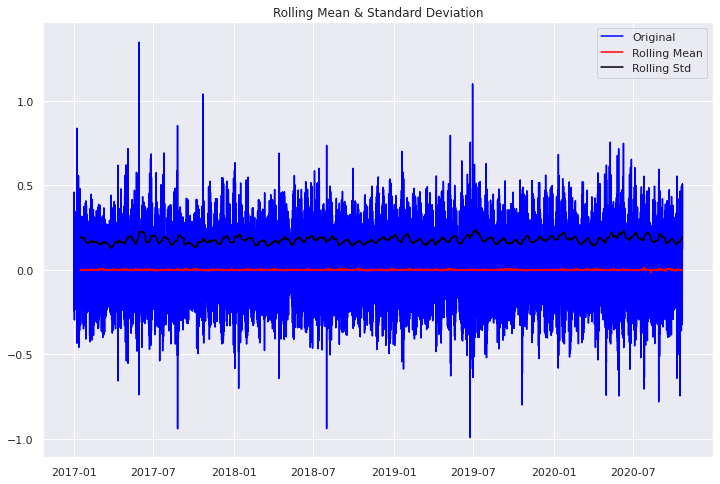

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                   -35.732415
p-value                            0.000000
#Lags Used                        52.000000
Number of Observations Used    33284.000000
Critical Value (1%)               -3.430546
Critical Value (5%)               -2.861627
Critical Value (10%)              -2.566816
dtype: float64


In [56]:

# first difference
waterleveldf['diff'] = waterleveldf['Water Level'] - waterleveldf['Water Level'].shift(1)  
test_stationarity(waterleveldf['diff'].dropna(inplace=False))


In [57]:
waterleveldiff = waterleveldf.dropna()
waterleveldiff

,Water Level,diff
Date Time,,
2017-01-01 01:00:00,2.246100,-0.201400
2017-01-01 02:00:00,2.250600,0.004500
2017-01-01 03:00:00,2.102700,-0.147900
2017-01-01 04:00:00,2.027900,-0.074800
2017-01-01 05:00:00,1.914100,-0.113800
...,...,...
2020-10-20 21:00:00,1.858000,0.406700
2020-10-20 22:00:00,2.366700,0.508700
2020-10-20 23:00:00,2.721800,0.355100


In [58]:
split_date = '01-Jan-2020 00:00:00'
waterleveldiff_train = waterleveldiff.loc[waterleveldiff.index < split_date].copy()
waterleveldiff_test = waterleveldiff.loc[waterleveldiff.index >= split_date].copy()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-39829.544, Time=52.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-16923.365, Time=4.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-35085.536, Time=3.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-28697.327, Time=7.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-16925.364, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-35259.065, Time=21.83 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-35123.423, Time=21.01 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-35225.163, Time=44.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-41486.451, Time=44.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-35708.638, Time=30.79 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-40032.820, Time=62.65 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-41594.424, Time=67.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-36357.010, Time=37.14 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-41482.765, Time=72.76

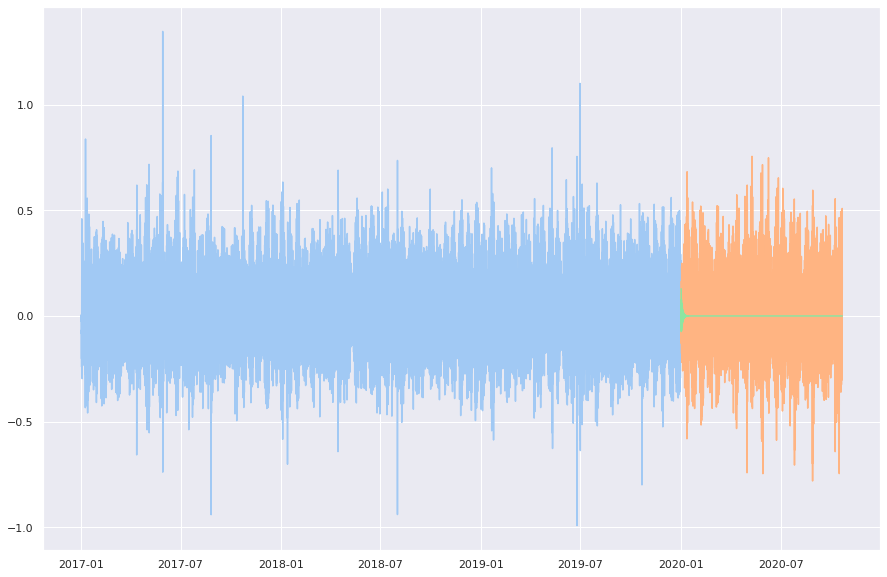

In [59]:
model = auto_arima(waterleveldiff_train['diff'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(waterleveldiff_train['diff'])

forecast = model.predict(n_periods=len(waterleveldiff_test['diff']))
forecast = pd.DataFrame(forecast,index = waterleveldiff_test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(15,10))
plt.plot(waterleveldiff_train['diff'], label='Train')
plt.plot(waterleveldiff_test['diff'], label='Test')
plt.plot(forecast, label='Prediction')
plt.show()



In [60]:
print('Evaluating the results of Model 3')
evaluate(waterleveldiff_test['diff'],forecast)

Evaluating the results of Model 3


,RMSE,R2,MSE,ME,MAE,MedAE,MaxErr
,0.186,-1873.629,0.034,-0.0,0.146,0.12,0.781


In [61]:
Actual = waterleveldiff_test.reset_index()
Actual

,Date Time,Water Level,diff
0,2020-01-01 00:00:00,1.534800,0.107200
1,2020-01-01 01:00:00,1.636500,0.101700
2,2020-01-01 02:00:00,1.705300,0.068800
3,2020-01-01 03:00:00,1.627100,-0.078200
4,2020-01-01 04:00:00,1.598100,-0.029000
...,...,...,...
7053,2020-10-20 21:00:00,1.858000,0.406700
7054,2020-10-20 22:00:00,2.366700,0.508700
7055,2020-10-20 23:00:00,2.721800,0.355100
7056,2020-10-21 00:00:00,2.967100,0.245300


In [62]:
Prediction = forecast['Prediction']
Prediction = Prediction.reset_index(drop=True)
Prediction

0       1.287189e-01
1       6.629691e-02
2       6.875094e-03
3      -3.921822e-02
4      -6.986691e-02
            ...     
7053   -1.073873e-56
7054   -1.334788e-56
7055   -1.258345e-56
7056   -8.752019e-57
7057   -2.903486e-57
Name: Prediction, Length: 7058, dtype: float64

**Pridicted Value of Model 3**

In [63]:
output = pd.concat([Actual, Prediction],axis=1)
output = output.set_index(['Date Time'])
output.head()

,Water Level,diff,Prediction
Date Time,,,
2020-01-01 00:00:00,1.5348,0.1072,0.128719
2020-01-01 01:00:00,1.6365,0.1017,0.066297
2020-01-01 02:00:00,1.7053,0.0688,0.006875
2020-01-01 03:00:00,1.6271,-0.0782,-0.039218
2020-01-01 04:00:00,1.5981,-0.0290,-0.069867


In [64]:
testdates = pd.date_range('01-01-2020','10-15-2020',freq='12H')
outputdf=output.reindex(testdates)
outputdf

,Water Level,diff,Prediction
2020-01-01 00:00:00,1.534800,0.107200,1.287189e-01
2020-01-01 12:00:00,1.224300,-0.042500,6.361458e-02
2020-01-02 00:00:00,1.594700,0.197100,5.679027e-02
2020-01-02 12:00:00,1.761200,-0.013500,4.849375e-02
2020-01-03 00:00:00,1.829000,0.100100,3.942023e-02
...,...,...,...
2020-10-13 00:00:00,0.911444,0.041644,1.473963e-55
2020-10-13 12:00:00,1.839500,-0.089700,1.824530e-55
2020-10-14 00:00:00,0.695400,-0.126378,1.914185e-55
2020-10-14 12:00:00,1.679600,-0.096289,1.827243e-55


In [65]:
waterleveldiff_test

,Water Level,diff
Date Time,,
2020-01-01 00:00:00,1.534800,0.107200
2020-01-01 01:00:00,1.636500,0.101700
2020-01-01 02:00:00,1.705300,0.068800
2020-01-01 03:00:00,1.627100,-0.078200
2020-01-01 04:00:00,1.598100,-0.029000
...,...,...
2020-10-20 21:00:00,1.858000,0.406700
2020-10-20 22:00:00,2.366700,0.508700
2020-10-20 23:00:00,2.721800,0.355100


# Model 4 based on diff order = 1 for Prophet Model

**# Format data for prophet model using ds and y**

In [66]:
waterleveldiff_train.reset_index() \
    .rename(columns={'Date Time':'ds',
                     'diff':'y'}).head()

,ds,Water Level,y
0,2017-01-01 01:00:00,2.2461,-0.2014
1,2017-01-01 02:00:00,2.2506,0.0045
2,2017-01-01 03:00:00,2.1027,-0.1479
3,2017-01-01 04:00:00,2.0279,-0.0748
4,2017-01-01 05:00:00,1.9141,-0.1138


**# Setup and train model and fit**

In [67]:
model = Prophet()
model.fit(waterleveldiff_train.reset_index() \
    .rename(columns={'Date Time':'ds',
                     'diff':'y'}))

**# Predict on training set with model**

In [68]:
waterleveldf_test_fcst = model.predict(df=waterleveldiff_test.reset_index() \
                                   .rename(columns={'Date Time':'ds'}))


In [69]:
waterleveldf_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,0.000151,-0.253187,0.198856,0.000151,0.000151,-0.043045,-0.043045,-0.043045,-0.043887,-0.043887,-0.043887,0.001809,0.001809,0.001809,-0.000967,-0.000967,-0.000967,0.0,0.0,0.0,-0.042894
1,2020-01-01 01:00:00,0.000151,-0.254621,0.193189,0.000151,0.000151,-0.034138,-0.034138,-0.034138,-0.034941,-0.034941,-0.034941,0.001772,0.001772,0.001772,-0.000970,-0.000970,-0.000970,0.0,0.0,0.0,-0.033988
2,2020-01-01 02:00:00,0.000151,-0.223795,0.221763,0.000151,0.000151,-0.012104,-0.012104,-0.012104,-0.012856,-0.012856,-0.012856,0.001725,0.001725,0.001725,-0.000973,-0.000973,-0.000973,0.0,0.0,0.0,-0.011953
3,2020-01-01 03:00:00,0.000151,-0.208915,0.221350,0.000151,0.000151,0.010738,0.010738,0.010738,0.010048,0.010048,0.010048,0.001665,0.001665,0.001665,-0.000975,-0.000975,-0.000975,0.0,0.0,0.0,0.010889
4,2020-01-01 04:00:00,0.000151,-0.214550,0.251634,0.000151,0.000151,0.025286,0.025286,0.025286,0.024669,0.024669,0.024669,0.001595,0.001595,0.001595,-0.000978,-0.000978,-0.000978,0.0,0.0,0.0,0.025437


**# Plot the forecast**

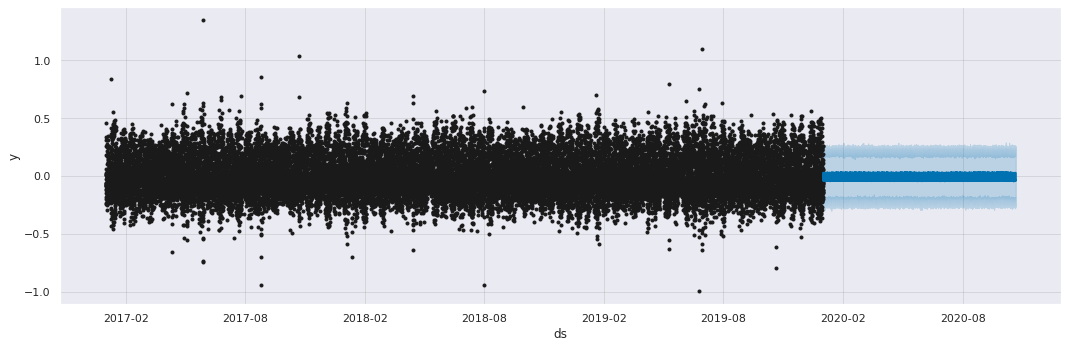

In [70]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(waterleveldf_test_fcst,
                 ax=ax)
plt.show()

**# Plot the components of the model**

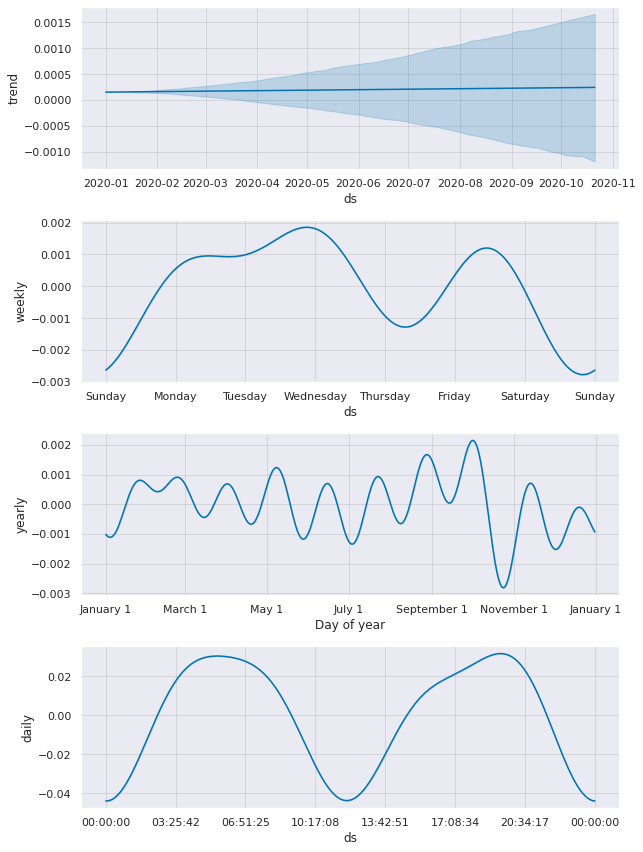

In [71]:
fig = model.plot_components(waterleveldf_test_fcst)

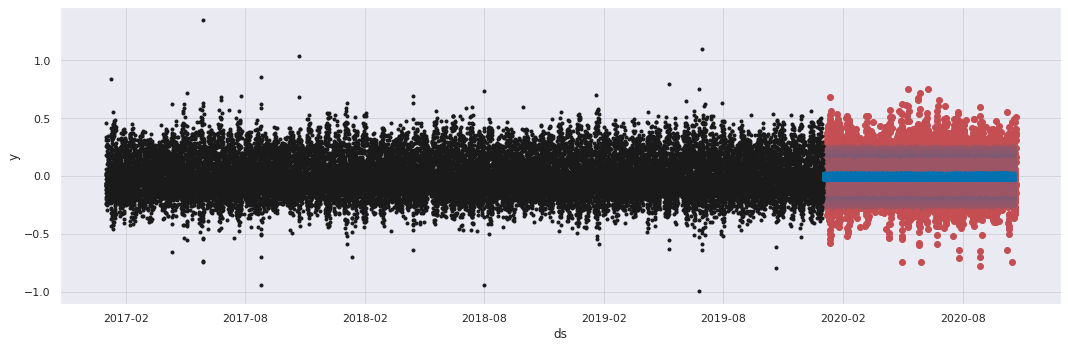

In [72]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(waterleveldiff_test.index, waterleveldiff_test['diff'], color='r')
fig = model.plot(waterleveldf_test_fcst, ax=ax)

**#Evaluating Model 4**

In [73]:
evaluate(waterleveldiff_test['diff'],
                   waterleveldf_test_fcst['yhat'])

,RMSE,R2,MSE,ME,MAE,MedAE,MaxErr
,0.184,-48.056,0.034,0.0,0.145,0.119,0.812


In [74]:
Actual = waterleveldiff_test.reset_index()
Actual

,Date Time,Water Level,diff
0,2020-01-01 00:00:00,1.534800,0.107200
1,2020-01-01 01:00:00,1.636500,0.101700
2,2020-01-01 02:00:00,1.705300,0.068800
3,2020-01-01 03:00:00,1.627100,-0.078200
4,2020-01-01 04:00:00,1.598100,-0.029000
...,...,...,...
7053,2020-10-20 21:00:00,1.858000,0.406700
7054,2020-10-20 22:00:00,2.366700,0.508700
7055,2020-10-20 23:00:00,2.721800,0.355100
7056,2020-10-21 00:00:00,2.967100,0.245300


In [75]:
Prediction = waterleveldf_test_fcst['yhat']
Prediction = Prediction.reset_index(drop=True)
Prediction

0      -0.042894
1      -0.033988
2      -0.011953
3       0.010889
4       0.025437
          ...   
7053    0.014884
7054   -0.009890
7055   -0.034101
7056   -0.044480
7057   -0.035575
Name: yhat, Length: 7058, dtype: float64

In [76]:
output = pd.concat([Actual, Prediction],axis=1)
output = output.set_index(['Date Time'])
output.head()

,Water Level,diff,yhat
Date Time,,,
2020-01-01 00:00:00,1.5348,0.1072,-0.042894
2020-01-01 01:00:00,1.6365,0.1017,-0.033988
2020-01-01 02:00:00,1.7053,0.0688,-0.011953
2020-01-01 03:00:00,1.6271,-0.0782,0.010889
2020-01-01 04:00:00,1.5981,-0.0290,0.025437


**#Predicted values of Model 4**

In [77]:
testdates = pd.date_range('01-01-2020','10-15-2020',freq='12H')
outputdf=output.reindex(testdates)
outputdf

,Water Level,diff,yhat
2020-01-01 00:00:00,1.534800,0.107200,-0.042894
2020-01-01 12:00:00,1.224300,-0.042500,-0.043623
2020-01-02 00:00:00,1.594700,0.197100,-0.045703
2020-01-02 12:00:00,1.761200,-0.013500,-0.045451
2020-01-03 00:00:00,1.829000,0.100100,-0.044445
...,...,...,...
2020-10-13 00:00:00,0.911444,0.041644,-0.043175
2020-10-13 12:00:00,1.839500,-0.089700,-0.042366
2020-10-14 00:00:00,0.695400,-0.126378,-0.042702
2020-10-14 12:00:00,1.679600,-0.096289,-0.043567
